In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [167]:
df = pd.read_csv('./dataset/train.csv')
df

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,5,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0
...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,BMV,SUBCOMPACT,na,8.0,AS8,Z,33.71 L/100 km,12.99 km per L,4.54 km per L,275.0
137137,137138,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,15.41 km per L,0.87 L/100 km,59.38 MPG (AS),166.0
137138,137139,NIRRAN,MID-SIZE,1.8,4.0,AV,X,2.99 liters per 100 km,8.38 L/100 km,52.19 mpg Imp.,181.0
137139,137140,TOYOTI,COMPACT,1.8,4.0,na,X,11.48 L/100km,1275.84 mpg Imp.,0.64 L/10km,123.0


In [4]:
df = df.drop(['Id'], axis=1)
df

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0
...,...,...,...,...,...,...,...,...,...,...
137136,BMV,SUBCOMPACT,na,8.0,AS8,Z,33.71 L/100 km,12.99 km per L,4.54 km per L,275.0
137137,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,15.41 km per L,0.87 L/100 km,59.38 MPG (AS),166.0
137138,NIRRAN,MID-SIZE,1.8,4.0,AV,X,2.99 liters per 100 km,8.38 L/100 km,52.19 mpg Imp.,181.0
137139,TOYOTI,COMPACT,1.8,4.0,na,X,11.48 L/100km,1275.84 mpg Imp.,0.64 L/10km,123.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Make                   137141 non-null  object 
 1   Vehicle Class          135816 non-null  object 
 2   Engine Size(L)         120522 non-null  object 
 3   Cylinders              122986 non-null  object 
 4   Transmission           134536 non-null  object 
 5   Fuel Type              135286 non-null  object 
 6   Fuel Consumption City  134719 non-null  object 
 7   Fuel Consumption Hwy   134573 non-null  object 
 8   Fuel Consumption Comb  134559 non-null  object 
 9   CO2 Emissions(g/km)    137141 non-null  float64
dtypes: float64(1), object(9)
memory usage: 10.5+ MB


In [6]:
df.isna().sum()

Make                         0
Vehicle Class             1325
Engine Size(L)           16619
Cylinders                14155
Transmission              2605
Fuel Type                 1855
Fuel Consumption City     2422
Fuel Consumption Hwy      2568
Fuel Consumption Comb     2582
CO2 Emissions(g/km)          0
dtype: int64

In [29]:
numerical = [
    "Engine Size(L)",
    "Cylinders",
]

categorical = ["Make", "Vehicle Class", "Transmission", "Fuel Type"]

# should_be_numerical = [
#     "Fuel Consumption City (L/100 km)",
#     "Fuel Consumption Hwy (L/100 km)",
#     "Fuel Consumption Comb (L/100 km)",
#     "Fuel Consumption Comb (mpg)",
# ]

should_be_numerical = [
    "Fuel Consumption City",
    "Fuel Consumption Hwy",
    "Fuel Consumption Comb",
]

In [31]:
df_should_be_numerical = df[should_be_numerical]
df_should_be_numerical

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.
1,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km
2,0.17 L/10km,2.03 liters per 100 km,zero
3,6.52 km per L,1.59 L/10km,NaN
4,20.15 L/100km,0.60 L/10km,1.38 L/10km
...,...,...,...
137136,33.71 L/100 km,12.99 km per L,4.54 km per L
137137,15.41 km per L,0.87 L/100 km,59.38 MPG (AS)
137138,2.99 liters per 100 km,8.38 L/100 km,52.19 mpg Imp.
137139,11.48 L/100km,1275.84 mpg Imp.,0.64 L/10km


In [30]:
df_should_be_numerical = df[should_be_numerical].apply(pd.to_numeric, errors="coerce")
df_should_be_numerical

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
137136,NaN,NaN,NaN
137137,NaN,NaN,NaN
137138,NaN,NaN,NaN
137139,NaN,NaN,NaN


In [10]:
for col in numerical:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [11]:
df

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0
...,...,...,...,...,...,...,...,...,...,...
137136,BMV,SUBCOMPACT,NaN,8.0,AS8,Z,33.71 L/100 km,12.99 km per L,4.54 km per L,275.0
137137,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,15.41 km per L,0.87 L/100 km,59.38 MPG (AS),166.0
137138,NIRRAN,MID-SIZE,1.8,4.0,AV,X,2.99 liters per 100 km,8.38 L/100 km,52.19 mpg Imp.,181.0
137139,TOYOTI,COMPACT,1.8,4.0,na,X,11.48 L/100km,1275.84 mpg Imp.,0.64 L/10km,123.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Make                   137141 non-null  object 
 1   Vehicle Class          135816 non-null  object 
 2   Engine Size(L)         113627 non-null  float64
 3   Cylinders              117266 non-null  float64
 4   Transmission           134536 non-null  object 
 5   Fuel Type              135286 non-null  object 
 6   Fuel Consumption City  134719 non-null  object 
 7   Fuel Consumption Hwy   134573 non-null  object 
 8   Fuel Consumption Comb  134559 non-null  object 
 9   CO2 Emissions(g/km)    137141 non-null  float64
dtypes: float64(3), object(7)
memory usage: 10.5+ MB


In [13]:
df.nunique()

Make                        21
Vehicle Class               24
Engine Size(L)              43
Cylinders                    8
Transmission                33
Fuel Type                   13
Fuel Consumption City    33648
Fuel Consumption Hwy     34963
Fuel Consumption Comb    26157
CO2 Emissions(g/km)       4508
dtype: int64

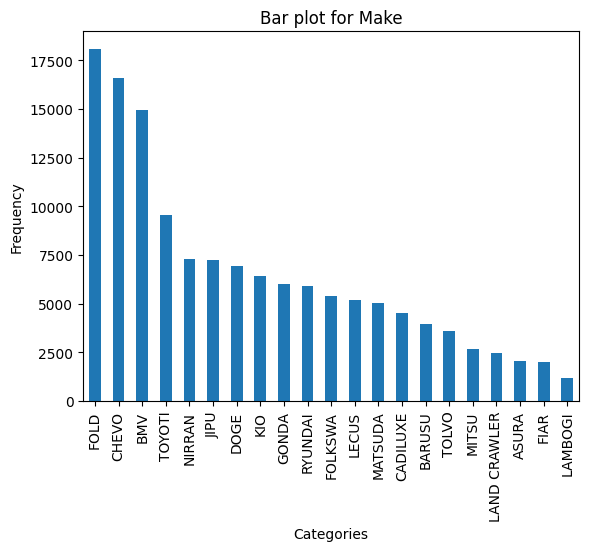

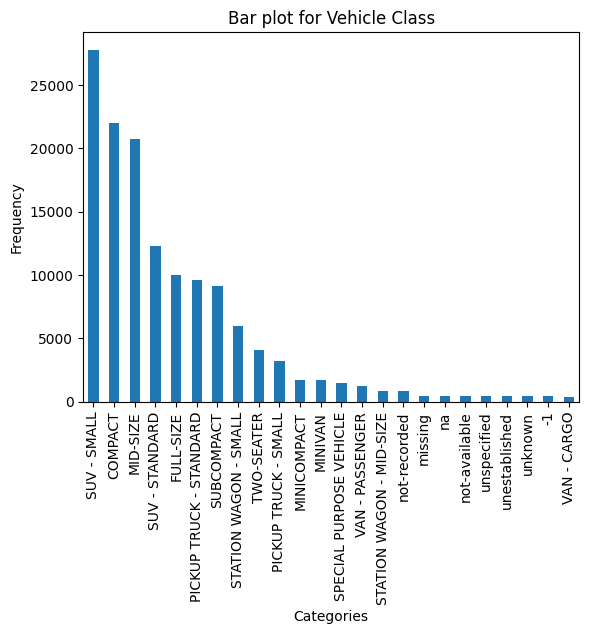

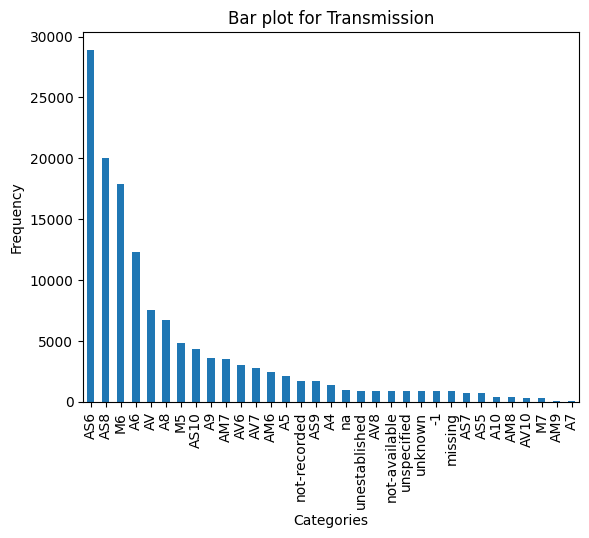

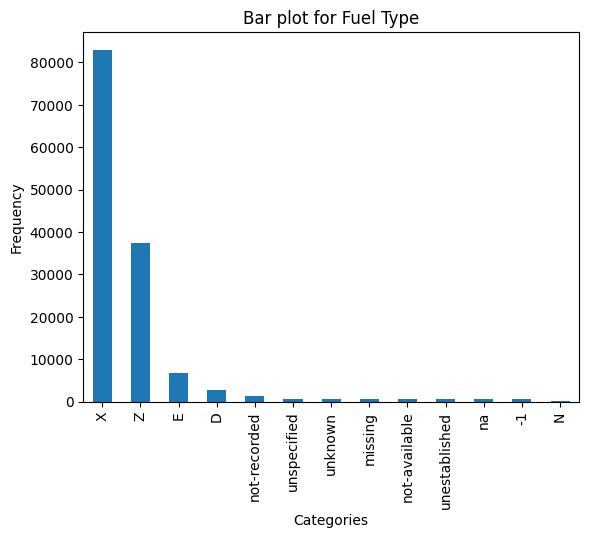

In [18]:
# Assuming categorical_columns is a list of your categorical column names
for col in categorical:
    value_counts = df[col].value_counts()

    # Create a bar plot
    value_counts.plot(kind="bar")

    # Add title and labels
    plt.title(f"Bar plot for {col}")
    plt.xlabel("Categories")
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()

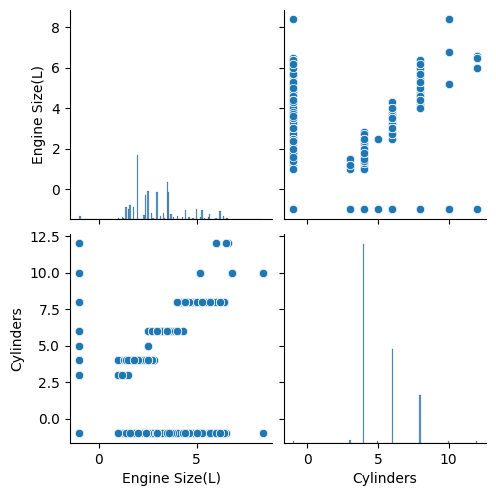

In [21]:
sns.pairplot(df[numerical])

In [24]:
# ada nilai -1

df_numerical = df[numerical]
df_numerical

,Engine Size(L),Cylinders
0,3.5,6.0
1,5.3,NaN
2,4.4,NaN
3,NaN,4.0
4,3.0,6.0
...,...,...
137136,NaN,8.0
137137,1.5,4.0
137138,1.8,4.0
137139,1.8,4.0


In [142]:
df_categorical = df[categorical]
df_categorical

,Make,Vehicle Class,Transmission,Fuel Type
0,FOLD,PICKUP TRUCK - STANDARD,A6,X
1,CHEVO,PICKUP TRUCK - STANDARD,A6,E
2,BMV,SUBCOMPACT,M6,Z
3,KIO,SUV - SMALL,AS6,X
4,BARUSU,MINICOMPACT,unspecified,Z
...,...,...,...,...
137136,BMV,SUBCOMPACT,AS8,Z
137137,GONDA,STATION WAGON - SMALL,M6,X
137138,NIRRAN,MID-SIZE,AV,X
137139,TOYOTI,COMPACT,na,X


In [27]:
df_categorical.astype("object").describe()

,Make,Vehicle Class,Transmission,Fuel Type
count,137141,135816,134536,135286
unique,21,24,33,13
top,FOLD,SUV - SMALL,AS6,X
freq,18081,27799,28926,83001


# 2. CLEAN ALL THE DATA (NUMERICAL, NOT YET DROPPED) | [[2023-12-07|Thursday]] 01:39 AM

Remove number in should_be_numerical columns

In [48]:
import re


def remove_numbers(input_string):
    if isinstance(input_string, str):
        return re.sub(r"\b\d+(\.\d+)?\b", "", input_string)
    else:
        # print("this is not a string:", input_string)
        return input_string

In [45]:
# test_string = "7.09 liters per 100 km"
# test_string = "15.13 L/100km"
test_string = "15.13"
test_result = remove_numbers(test_string)
test_result

''

In [46]:
df_should_be_numerical

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.
1,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km
2,0.17 L/10km,2.03 liters per 100 km,zero
3,6.52 km per L,1.59 L/10km,NaN
4,20.15 L/100km,0.60 L/10km,1.38 L/10km
...,...,...,...
137136,33.71 L/100 km,12.99 km per L,4.54 km per L
137137,15.41 km per L,0.87 L/100 km,59.38 MPG (AS)
137138,2.99 liters per 100 km,8.38 L/100 km,52.19 mpg Imp.
137139,11.48 L/100km,1275.84 mpg Imp.,0.64 L/10km


Fuel Consumption City    4
Fuel Consumption Hwy     4
Fuel Consumption Comb    4
dtype: int64


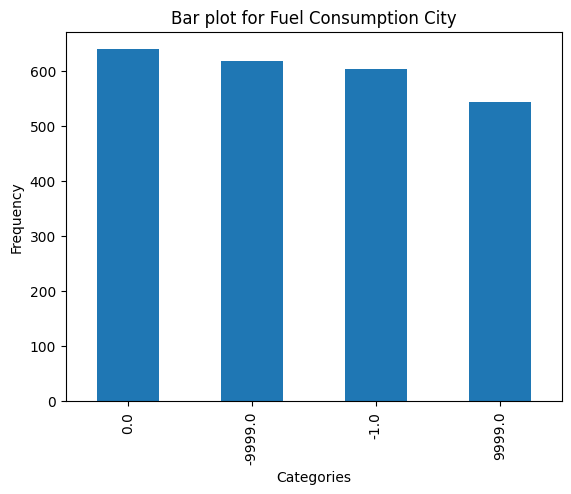

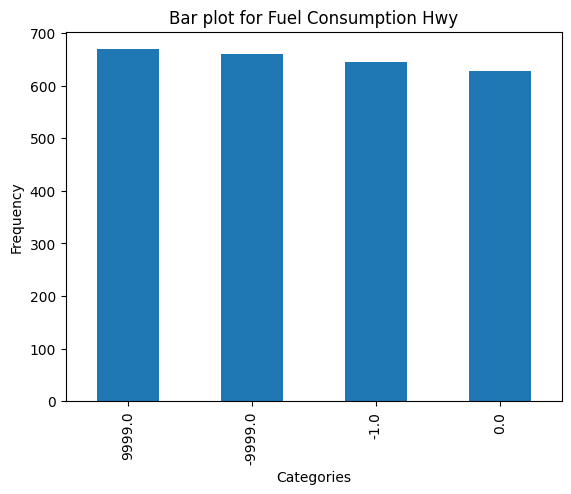

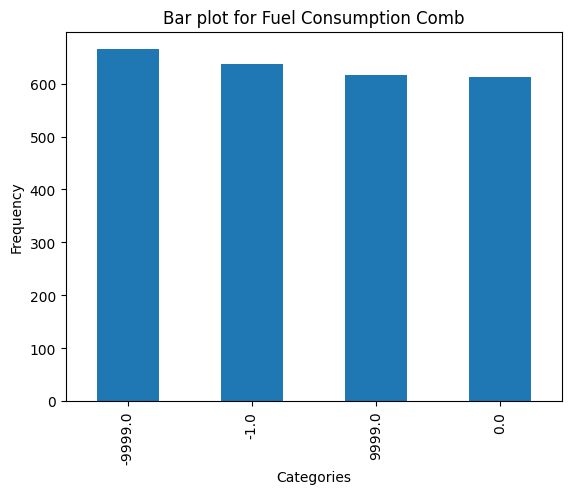

In [60]:
df_should_be_numerical_preprocessed_2 = df[should_be_numerical].apply(
    pd.to_numeric, errors="coerce"
)
print(df_should_be_numerical_preprocessed_2.nunique())

for col in df_should_be_numerical_preprocessed_2.columns.to_list():
    value_counts = df_should_be_numerical_preprocessed_2[col].value_counts()

    # Create a bar plot
    value_counts.plot(kind="bar")

    # Add title and labels
    plt.title(f"Bar plot for {col}")
    plt.xlabel("Categories")
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()

In [49]:
df_should_be_numerical_preprocessed = df_should_be_numerical.map(remove_numbers)
df_should_be_numerical_preprocessed

C:\Users\sesar\AppData\Local\Temp\ipykernel_12984\773579244.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_should_be_numerical_preprocessed = df_should_be_numerical.applymap(remove_numbers)


,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,liters per km,L/ km,mpg Imp.
1,liters per km,liters per km,L/ km
2,L/10km,liters per km,zero
3,km per L,L/10km,NaN
4,L/100km,L/10km,L/10km
...,...,...,...
137136,L/ km,km per L,km per L
137137,km per L,L/ km,MPG (AS)
137138,liters per km,L/ km,mpg Imp.
137139,L/100km,mpg Imp.,L/10km


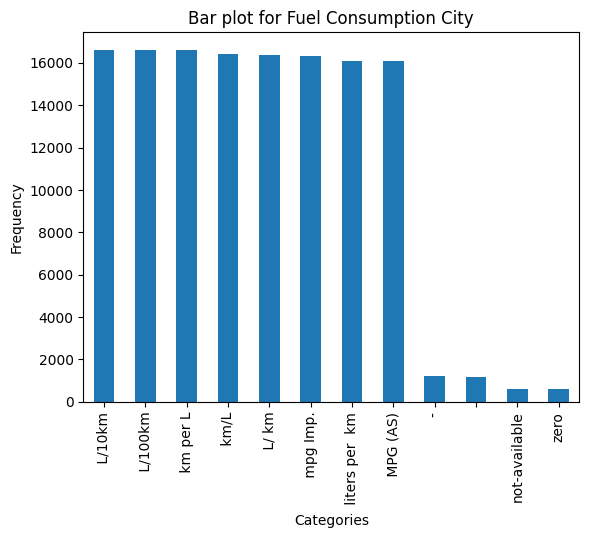

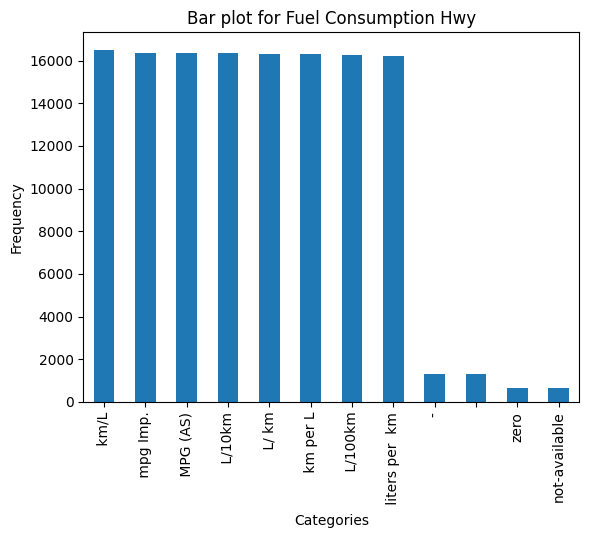

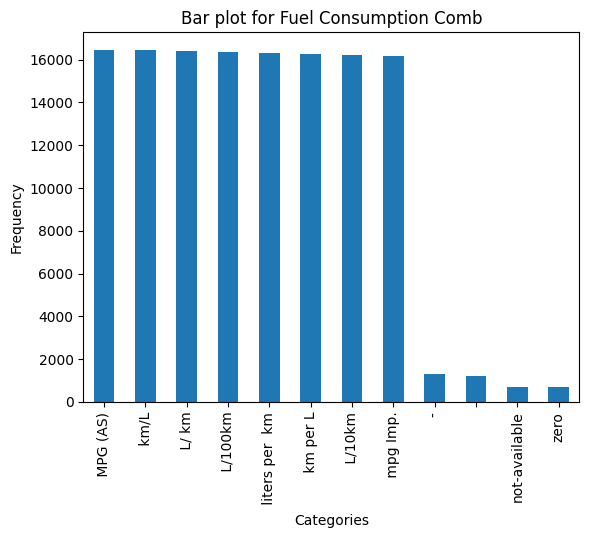

In [50]:
""" RESULT (keep in mind):
- "-1" jadi "-"
- "0" jadi "" (NOTHING)
"""


# Assuming categorical_columns is a list of your categorical column names
for col in df_should_be_numerical_preprocessed.columns.to_list():
    value_counts = df_should_be_numerical_preprocessed[col].value_counts()

    # Create a bar plot
    value_counts.plot(kind="bar")

    # Add title and labels
    plt.title(f"Bar plot for {col}")
    plt.xlabel("Categories")
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()

In [53]:
for col in df_should_be_numerical_preprocessed.columns.to_list():
    print(col, ':', df_should_be_numerical_preprocessed[col].unique())

Fuel Consumption City : [' liters per  km' ' L/10km' ' km per L' ' L/100km' ' MPG (AS)'
 ' mpg Imp.' '-' ' L/ km' ' km/L' '' nan 'not-available' 'zero']
Fuel Consumption Hwy : [' L/ km' ' liters per  km' ' L/10km' ' mpg Imp.' ' L/100km' ' km per L'
 'not-available' ' km/L' nan ' MPG (AS)' '-' '' 'zero']
Fuel Consumption Comb : [' mpg Imp.' ' L/ km' 'zero' nan ' L/10km' ' MPG (AS)' ' km/L' ' L/100km'
 '-' ' km per L' ' liters per  km' '' 'not-available']


In [122]:
# Define conversion functions
def km_per_l_to_l_per_100km(val):
    return 100 / val if val != 0 else 0


def mpg_imp_to_l_per_100km(val):
    return 282.481 / val if val != 0 else 0


def mpg_as_to_l_per_100km(val):
    return 235.214583 / val if val != 0 else 0


def l_per_10km_to_l_per_100km(val):
    return val * 10


# Define a function to standardize units
def standardize_units(row):
    for col in [
        "Fuel Consumption City",
        "Fuel Consumption Hwy",
        "Fuel Consumption Comb",
    ]:
        val = row[col]

        # if pd.isnull(val) or val in ["-", "", "not-available", "zero"]:
        if pd.isnull(val) or val in [
            "-1",
            "0",
            "9999",
            "-9999",
            "not-available",
            "zero",
        ]:
            row[col] = np.nan
        elif "km per L" in val or " km/L" in val:
            row[col] = km_per_l_to_l_per_100km(
                float(val.replace(" km per L", "").replace(" km/L", ""))
            )
        elif "mpg Imp." in val:
            row[col] = mpg_imp_to_l_per_100km(float(val.replace(" mpg Imp.", "")))
        elif "MPG (AS)" in val:
            row[col] = mpg_as_to_l_per_100km(float(val.replace(" MPG (AS)", "")))
        # elif "L/10km" in val or " L/ km" in val:
        elif "L/10km" in val:
            row[col] = l_per_10km_to_l_per_100km(
                # float(val.replace(" L/10km", "").replace(" L/ km", ""))
                float(val.replace(" L/10km", ""))
            )
        elif "liters per 100 km" in val or " L/100 km" in val or " L/100km" in val:
            row[col] = float(
                val.replace(" liters per 100 km", "")
                .replace(" L/100 km", "")
                .replace(" L/100km", "")
            )
    return row

In [123]:
# Apply the function to each row in the DataFrame
df_should_be_numerical_fixed = df[should_be_numerical].apply(standardize_units, axis=1)
df_should_be_numerical_fixed

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,8.640000,6.140000,7.514791
1,27.270000,30.760000,28.840000
2,1.700000,2.030000,NaN
3,15.337423,15.900000,NaN
4,20.150000,6.000000,13.800000
...,...,...,...
137136,33.710000,7.698229,22.026432
137137,6.489293,0.870000,3.961175
137138,2.990000,8.380000,5.412550
137139,11.480000,0.221408,6.400000


In [124]:
df_should_be_numerical_fixed = df_should_be_numerical_fixed.map(pd.to_numeric)
df_should_be_numerical_fixed

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,8.640000,6.140000,7.514791
1,27.270000,30.760000,28.840000
2,1.700000,2.030000,NaN
3,15.337423,15.900000,NaN
4,20.150000,6.000000,13.800000
...,...,...,...
137136,33.710000,7.698229,22.026432
137137,6.489293,0.870000,3.961175
137138,2.990000,8.380000,5.412550
137139,11.480000,0.221408,6.400000


In [125]:
df_should_be_numerical_fixed.describe()

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
count,131093.000000,130653.000000,130651.000000
mean,14.053971,10.512222,12.460682
std,9.904930,7.578798,6.606855
min,0.000000,0.000000,0.046700
25%,6.381621,4.602167,7.603038
50%,12.645945,9.330000,11.627907
75%,19.870000,14.930000,16.339869
max,92.592593,68.027211,62.893082


In [126]:
for col in should_be_numerical:
    df_should_be_numerical_fixed[col] = df_should_be_numerical_fixed[col].apply(
        lambda x: np.nan if x in [0] else x
    )

df_should_be_numerical_fixed

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,8.640000,6.140000,7.514791
1,27.270000,30.760000,28.840000
2,1.700000,2.030000,NaN
3,15.337423,15.900000,NaN
4,20.150000,6.000000,13.800000
...,...,...,...
137136,33.710000,7.698229,22.026432
137137,6.489293,0.870000,3.961175
137138,2.990000,8.380000,5.412550
137139,11.480000,0.221408,6.400000


In [127]:
df_should_be_numerical_fixed.describe()

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
count,131056.000000,130590.000000,130651.000000
mean,14.057939,10.517293,12.460682
std,9.903512,7.577107,6.606855
min,0.000006,0.000875,0.046700
25%,6.390000,4.610000,7.603038
50%,12.650000,9.337068,11.627907
75%,19.879029,14.940000,16.339869
max,92.592593,68.027211,62.893082


In [128]:
df_should_be_numerical_fixed

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,8.640000,6.140000,7.514791
1,27.270000,30.760000,28.840000
2,1.700000,2.030000,NaN
3,15.337423,15.900000,NaN
4,20.150000,6.000000,13.800000
...,...,...,...
137136,33.710000,7.698229,22.026432
137137,6.489293,0.870000,3.961175
137138,2.990000,8.380000,5.412550
137139,11.480000,0.221408,6.400000


In [129]:
counts = df_should_be_numerical_fixed[
    (df_should_be_numerical_fixed >= 0) & (df_should_be_numerical_fixed <= 0.01)
].count()
counts

Fuel Consumption City    47
Fuel Consumption Hwy     67
Fuel Consumption Comb     0
dtype: int64

In [130]:
df_should_be_numerical_fixed_filtered = df_should_be_numerical_fixed[
    (df_should_be_numerical_fixed >= 0) & (df_should_be_numerical_fixed <= 1)
]
df_should_be_numerical_fixed_filtered

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
137136,NaN,NaN,NaN
137137,NaN,0.870000,NaN
137138,NaN,NaN,NaN
137139,NaN,0.221408,NaN


In [131]:
rows_with_zero = df_should_be_numerical_fixed[
    df_should_be_numerical_fixed.eq(0).any(axis=1)
    # df_should_be_numerical_fixed.eq(-9999).any(axis=1)
    # df_should_be_numerical_fixed.eq(9999).any(axis=1)
    # df_should_be_numerical_fixed.eq(-1).any(axis=1)
]
rows_with_zero

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb


In [132]:
df_should_be_numerical_fixed = df_should_be_numerical_fixed.rename(
    columns={
        "Fuel Consumption City": "Fuel Consumption City (L/100Km)",
        "Fuel Consumption Hwy": "Fuel Consumption Hwy (L/100Km)",
        "Fuel Consumption Comb": "Fuel Consumption Comb (L/100Km)",
    }
)

df_should_be_numerical_fixed

,Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km)
0,8.640000,6.140000,7.514791
1,27.270000,30.760000,28.840000
2,1.700000,2.030000,NaN
3,15.337423,15.900000,NaN
4,20.150000,6.000000,13.800000
...,...,...,...
137136,33.710000,7.698229,22.026432
137137,6.489293,0.870000,3.961175
137138,2.990000,8.380000,5.412550
137139,11.480000,0.221408,6.400000


# Merge df_should_be_numerical_fixed

In [133]:
df_fix1 = df.drop(should_be_numerical, axis=1)
df_fix1 = pd.concat([df_fix1, df_should_be_numerical_fixed], axis=1)
df_fix1

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,306.0,8.640000,6.140000,7.514791
1,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,283.0,27.270000,30.760000,28.840000
2,BMV,SUBCOMPACT,4.4,NaN,M6,Z,329.0,1.700000,2.030000,NaN
3,KIO,SUV - SMALL,NaN,4.0,AS6,X,270.0,15.337423,15.900000,NaN
4,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,193.0,20.150000,6.000000,13.800000
...,...,...,...,...,...,...,...,...,...,...
137136,BMV,SUBCOMPACT,NaN,8.0,AS8,Z,275.0,33.710000,7.698229,22.026432
137137,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,166.0,6.489293,0.870000,3.961175
137138,NIRRAN,MID-SIZE,1.8,4.0,AV,X,181.0,2.990000,8.380000,5.412550
137139,TOYOTI,COMPACT,1.8,4.0,na,X,123.0,11.480000,0.221408,6.400000


# 3. CLEAN ALL THE DATA (CATEGORICAL, NOT YET DROPPED) | [[2023-12-07|Thursday]] 02:13 AM

Remove:
- not-recorded
- missing
- na
- not-available
- unspecified
- unestablished
- unknown
- -1 

in categorical columns

In [143]:
df_categorical

,Make,Vehicle Class,Transmission,Fuel Type
0,FOLD,PICKUP TRUCK - STANDARD,A6,X
1,CHEVO,PICKUP TRUCK - STANDARD,A6,E
2,BMV,SUBCOMPACT,M6,Z
3,KIO,SUV - SMALL,AS6,X
4,BARUSU,MINICOMPACT,unspecified,Z
...,...,...,...,...
137136,BMV,SUBCOMPACT,AS8,Z
137137,GONDA,STATION WAGON - SMALL,M6,X
137138,NIRRAN,MID-SIZE,AV,X
137139,TOYOTI,COMPACT,na,X


In [145]:
values_to_replace = [
    "not-recorded",
    "missing",
    "na",
    "not-available",
    "unspecified",
    "unestablished",
    "unknown",
    "-1",
]

df_categorical_fixed = df_categorical.replace(values_to_replace, np.nan)
df_categorical_fixed

,Make,Vehicle Class,Transmission,Fuel Type
0,FOLD,PICKUP TRUCK - STANDARD,A6,X
1,CHEVO,PICKUP TRUCK - STANDARD,A6,E
2,BMV,SUBCOMPACT,M6,Z
3,KIO,SUV - SMALL,AS6,X
4,BARUSU,MINICOMPACT,NaN,Z
...,...,...,...,...
137136,BMV,SUBCOMPACT,AS8,Z
137137,GONDA,STATION WAGON - SMALL,M6,X
137138,NIRRAN,MID-SIZE,AV,X
137139,TOYOTI,COMPACT,NaN,X


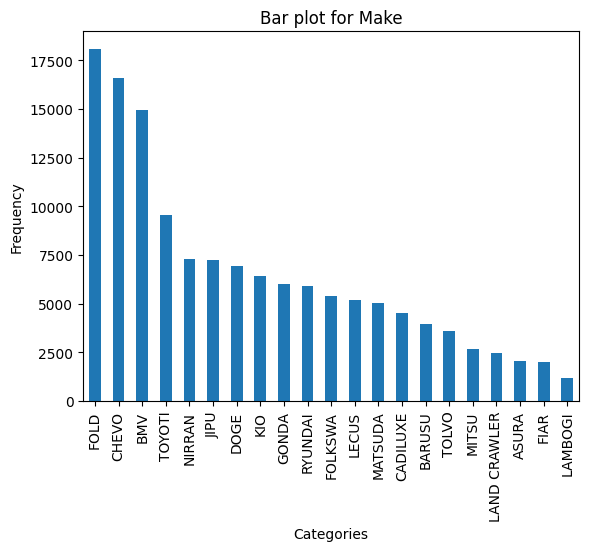

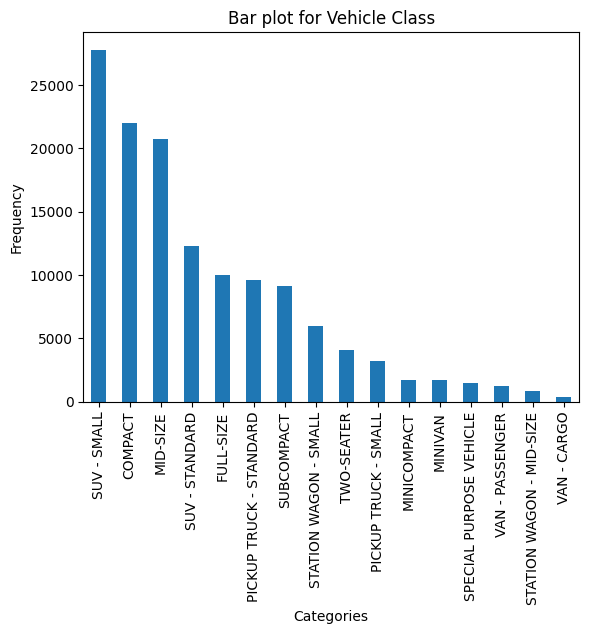

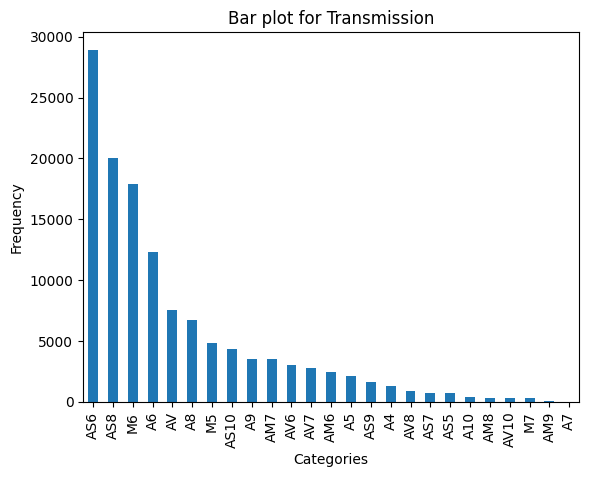

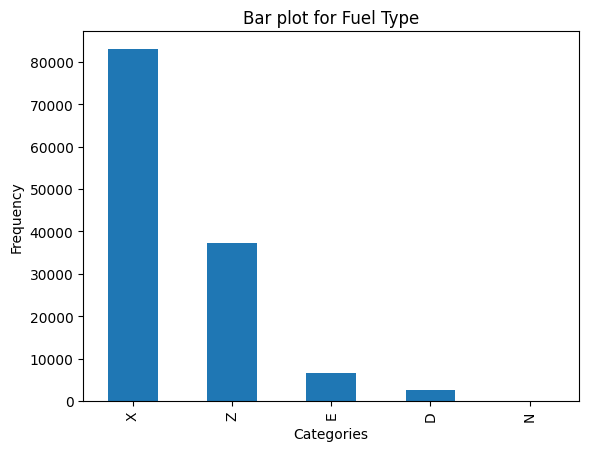

In [146]:
for col in df_categorical_fixed.columns.to_list():
    value_counts = df_categorical_fixed[col].value_counts()

    # Create a bar plot
    value_counts.plot(kind="bar")

    # Add title and labels
    plt.title(f"Bar plot for {col}")
    plt.xlabel("Categories")
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()

# Merge df_categorical_fixed

In [147]:
df_fix1

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,306.0,8.640000,6.140000,7.514791
1,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,283.0,27.270000,30.760000,28.840000
2,BMV,SUBCOMPACT,4.4,NaN,M6,Z,329.0,1.700000,2.030000,NaN
3,KIO,SUV - SMALL,NaN,4.0,AS6,X,270.0,15.337423,15.900000,NaN
4,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,193.0,20.150000,6.000000,13.800000
...,...,...,...,...,...,...,...,...,...,...
137136,BMV,SUBCOMPACT,NaN,8.0,AS8,Z,275.0,33.710000,7.698229,22.026432
137137,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,166.0,6.489293,0.870000,3.961175
137138,NIRRAN,MID-SIZE,1.8,4.0,AV,X,181.0,2.990000,8.380000,5.412550
137139,TOYOTI,COMPACT,1.8,4.0,na,X,123.0,11.480000,0.221408,6.400000


In [148]:
df_fix2 = df_fix1.drop(categorical, axis=1)
df_fix2 = pd.concat([df_fix2, df_categorical_fixed], axis=1)
df_fix2

,Engine Size(L),Cylinders,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type
0,3.5,6.0,306.0,8.640000,6.140000,7.514791,FOLD,PICKUP TRUCK - STANDARD,A6,X
1,5.3,NaN,283.0,27.270000,30.760000,28.840000,CHEVO,PICKUP TRUCK - STANDARD,A6,E
2,4.4,NaN,329.0,1.700000,2.030000,NaN,BMV,SUBCOMPACT,M6,Z
3,NaN,4.0,270.0,15.337423,15.900000,NaN,KIO,SUV - SMALL,AS6,X
4,3.0,6.0,193.0,20.150000,6.000000,13.800000,BARUSU,MINICOMPACT,NaN,Z
...,...,...,...,...,...,...,...,...,...,...
137136,NaN,8.0,275.0,33.710000,7.698229,22.026432,BMV,SUBCOMPACT,AS8,Z
137137,1.5,4.0,166.0,6.489293,0.870000,3.961175,GONDA,STATION WAGON - SMALL,M6,X
137138,1.8,4.0,181.0,2.990000,8.380000,5.412550,NIRRAN,MID-SIZE,AV,X
137139,1.8,4.0,123.0,11.480000,0.221408,6.400000,TOYOTI,COMPACT,NaN,X


# 4. CLEAN ALL THE DATA (NUMERICAL) | [[2023-12-07|Thursday]] 02:21 AM

for column: ['Engine Size(L)', 'Cylinders']

In [150]:
df_numerical

,Engine Size(L),Cylinders
0,3.5,6.0
1,5.3,NaN
2,4.4,NaN
3,NaN,4.0
4,3.0,6.0
...,...,...
137136,NaN,8.0
137137,1.5,4.0
137138,1.8,4.0
137139,1.8,4.0


In [152]:
# -1 is the problem

df_numerical.describe()

,Engine Size(L),Cylinders
count,113627.000000,117266.000000
mean,2.960442,5.119182
std,1.282319,1.638565
min,-1.000000,-1.000000
25%,2.000000,4.000000
50%,2.500000,4.000000
75%,3.600000,6.000000
max,8.400000,12.000000


In [162]:
rows_with_minus_one = df_numerical[
    df_numerical.eq(-1).any(axis=1)
    # df_should_be_numerical_fixed.eq(-9999).any(axis=1)
    # df_should_be_numerical_fixed.eq(9999).any(axis=1)
    # df_should_be_numerical_fixed.eq(-1).any(axis=1)
]
rows_with_minus_one

,Engine Size(L),Cylinders
171,3.2,-1.0
249,-1.0,4.0
371,3.0,-1.0
373,-1.0,4.0
432,3.6,-1.0
...,...,...
136660,-1.0,4.0
136725,-1.0,4.0
136803,-1.0,4.0
137005,-1.0,4.0


In [158]:
df_numerical_fixed = df_numerical.copy()

df_numerical_fixed["Engine Size(L)"] = df_numerical_fixed["Engine Size(L)"].apply(
    lambda x: np.nan if x in [-1, 0] else x
)

df_numerical_fixed["Cylinders"] = df_numerical_fixed["Cylinders"].apply(
    lambda x: np.nan if x in [-1] else x
)

df_numerical_fixed

,Engine Size(L),Cylinders
0,3.5,6.0
1,5.3,NaN
2,4.4,NaN
3,NaN,4.0
4,3.0,6.0
...,...,...
137136,NaN,8.0
137137,1.5,4.0
137138,1.8,4.0
137139,1.8,4.0


In [160]:
rows_with_minus_one = df_numerical_fixed[
    df_numerical_fixed.eq(0).any(axis=1)
    # df_should_be_numerical_fixed.eq(-9999).any(axis=1)
    # df_should_be_numerical_fixed.eq(9999).any(axis=1)
    # df_should_be_numerical_fixed.eq(-1).any(axis=1)
]
rows_with_minus_one

,Engine Size(L),Cylinders


In [163]:
df_numerical_fixed

,Engine Size(L),Cylinders
0,3.5,6.0
1,5.3,NaN
2,4.4,NaN
3,NaN,4.0
4,3.0,6.0
...,...,...
137136,NaN,8.0
137137,1.5,4.0
137138,1.8,4.0
137139,1.8,4.0


# Merge df_numerical_fixed

In [164]:
df_fix2

,Engine Size(L),Cylinders,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type
0,3.5,6.0,306.0,8.640000,6.140000,7.514791,FOLD,PICKUP TRUCK - STANDARD,A6,X
1,5.3,NaN,283.0,27.270000,30.760000,28.840000,CHEVO,PICKUP TRUCK - STANDARD,A6,E
2,4.4,NaN,329.0,1.700000,2.030000,NaN,BMV,SUBCOMPACT,M6,Z
3,NaN,4.0,270.0,15.337423,15.900000,NaN,KIO,SUV - SMALL,AS6,X
4,3.0,6.0,193.0,20.150000,6.000000,13.800000,BARUSU,MINICOMPACT,NaN,Z
...,...,...,...,...,...,...,...,...,...,...
137136,NaN,8.0,275.0,33.710000,7.698229,22.026432,BMV,SUBCOMPACT,AS8,Z
137137,1.5,4.0,166.0,6.489293,0.870000,3.961175,GONDA,STATION WAGON - SMALL,M6,X
137138,1.8,4.0,181.0,2.990000,8.380000,5.412550,NIRRAN,MID-SIZE,AV,X
137139,1.8,4.0,123.0,11.480000,0.221408,6.400000,TOYOTI,COMPACT,NaN,X


In [165]:
df_fix3 = df_fix2.drop(numerical, axis=1)
df_fix3 = pd.concat([df_fix3, df_numerical_fixed], axis=1)
df_fix3

,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders
0,306.0,8.640000,6.140000,7.514791,FOLD,PICKUP TRUCK - STANDARD,A6,X,3.5,6.0
1,283.0,27.270000,30.760000,28.840000,CHEVO,PICKUP TRUCK - STANDARD,A6,E,5.3,NaN
2,329.0,1.700000,2.030000,NaN,BMV,SUBCOMPACT,M6,Z,4.4,NaN
3,270.0,15.337423,15.900000,NaN,KIO,SUV - SMALL,AS6,X,NaN,4.0
4,193.0,20.150000,6.000000,13.800000,BARUSU,MINICOMPACT,NaN,Z,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...
137136,275.0,33.710000,7.698229,22.026432,BMV,SUBCOMPACT,AS8,Z,NaN,8.0
137137,166.0,6.489293,0.870000,3.961175,GONDA,STATION WAGON - SMALL,M6,X,1.5,4.0
137138,181.0,2.990000,8.380000,5.412550,NIRRAN,MID-SIZE,AV,X,1.8,4.0
137139,123.0,11.480000,0.221408,6.400000,TOYOTI,COMPACT,NaN,X,1.8,4.0


# FINALIZATION

In [168]:
df_id = df.pop("Id")
df_id

0              1
1              2
2              3
3              4
4              5
           ...  
137136    137137
137137    137138
137138    137139
137139    137140
137140    137141
Name: Id, Length: 137141, dtype: int64

In [169]:
df_fix3.insert(0, "Id", df_id)
df_fix3

,Id,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders
0,1,306.0,8.640000,6.140000,7.514791,FOLD,PICKUP TRUCK - STANDARD,A6,X,3.5,6.0
1,2,283.0,27.270000,30.760000,28.840000,CHEVO,PICKUP TRUCK - STANDARD,A6,E,5.3,NaN
2,3,329.0,1.700000,2.030000,NaN,BMV,SUBCOMPACT,M6,Z,4.4,NaN
3,4,270.0,15.337423,15.900000,NaN,KIO,SUV - SMALL,AS6,X,NaN,4.0
4,5,193.0,20.150000,6.000000,13.800000,BARUSU,MINICOMPACT,NaN,Z,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,275.0,33.710000,7.698229,22.026432,BMV,SUBCOMPACT,AS8,Z,NaN,8.0
137137,137138,166.0,6.489293,0.870000,3.961175,GONDA,STATION WAGON - SMALL,M6,X,1.5,4.0
137138,137139,181.0,2.990000,8.380000,5.412550,NIRRAN,MID-SIZE,AV,X,1.8,4.0
137139,137140,123.0,11.480000,0.221408,6.400000,TOYOTI,COMPACT,NaN,X,1.8,4.0


In [ ]:
df_fix3.to_csv("./dataset/train_preprocessed.csv", index=False)